In [113]:
# Temel kütüphaneler
import numpy as np
import pandas as pd

# Görselleştirme kütüphaneleri
import matplotlib.pyplot as plt
import seaborn as sns

# Veri ön işleme ve model seçimi için
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Modeller
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Model değerlendirme metrikleri
from sklearn.metrics import mean_squared_error, r2_score, classification_report, accuracy_score



In [114]:
# Dosya yolları
channels_file_path = "C:/Users/Lamiser/youtube_channel_info.csv"
videos_file_path = "C:/Users/Lamiser/youtube_video_info.csv"

In [115]:
# Veri setlerini yükleme
youtube_channel_info_df = pd.read_csv("youtube_channel_info.csv")
youtube_video_info_df = pd.read_csv("youtube_video_info.csv")


In [116]:
print("İlk 5 Satır:")
print(youtube_video_info_df.head())

İlk 5 Satır:
                                      Video Title     Video ID  \
0      Can You Solve The Riddle Of The Goddesses?  CWD3vGKOXSI   
1               Can You Solve This Insane Riddle?  lC0zZwT_RsA   
2  Americans Try To Pronounce Massachusetts Towns  AckzNzbF5E4   
3        People Play With Rats For The First Time  pakeDnCPe8s   
4             People Taste Test Puerto Rican Food  I1Cqv840gVE   

         Published Date  Video Age (Days)    Views   Likes  Comments  \
0  2016-07-04T19:00:00Z              3104  3041996   51015      5606   
1  2016-05-16T22:30:01Z              3153  8110049  117003      9964   
2  2015-03-19T21:13:32Z              3577  3017801   34373      7592   
3  2015-11-18T21:10:15Z              3333  3947826   69889      7649   
4  2015-07-31T02:00:00Z              3444  3692618   47694      6869   

   (Likes + Comments) / Views  Daily Views  Daily Likes  
0                      0.0186       980.02        16.44  
1                      0.0157      2572.1

In [117]:
print("\nVeri Bilgisi:")
print(youtube_video_info_df.info())


Veri Bilgisi:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Video Title                 506 non-null    object 
 1   Video ID                    506 non-null    object 
 2   Published Date              506 non-null    object 
 3   Video Age (Days)            506 non-null    int64  
 4   Views                       506 non-null    int64  
 5   Likes                       506 non-null    int64  
 6   Comments                    506 non-null    int64  
 7   (Likes + Comments) / Views  506 non-null    float64
 8   Daily Views                 506 non-null    float64
 9   Daily Likes                 506 non-null    float64
dtypes: float64(3), int64(4), object(3)
memory usage: 39.7+ KB
None


In [118]:
#Video Title   ,  Video ID  ,   Published Date bu sütunlari kaldırma
youtube_video_info_df = youtube_video_info_df.drop(columns=["Video Title", "Video ID", "Published Date"])

In [119]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler tanımlama
scaler = MinMaxScaler(feature_range=(0, 1000))

# Views sütununu ölçekleme
youtube_video_info_df['Views'] = scaler.fit_transform(youtube_video_info_df[['Views']]) * 1000


In [120]:
print("\nEksik Veri Kontrolü:")
print(youtube_video_info_df.isnull().sum())


Eksik Veri Kontrolü:
Video Age (Days)              0
Views                         0
Likes                         0
Comments                      0
(Likes + Comments) / Views    0
Daily Views                   0
Daily Likes                   0
dtype: int64


In [121]:
print("\nTemel İstatistikler:")
print(youtube_video_info_df.describe())


Temel İstatistikler:
       Video Age (Days)           Views          Likes      Comments  \
count        506.000000      506.000000     506.000000    506.000000   
mean        2615.486166   115731.606772   65539.092885   4345.223320   
std          789.668323   154924.711116   81580.272018   6125.993612   
min            1.000000        0.000000     120.000000      3.000000   
25%         1985.500000    21884.108398   17391.000000    879.000000   
50%         2702.000000    54901.897285   35971.500000   2059.500000   
75%         3287.750000   151782.009224   76046.750000   5139.500000   
max         4208.000000  1000000.000000  671119.000000  42550.000000   

       (Likes + Comments) / Views   Daily Views  Daily Likes  
count                  506.000000    506.000000   506.000000  
mean                     0.020307   1660.904723    26.831739  
std                      0.009274   2184.871399    35.031016  
min                      0.001000     31.790000     0.470000  
25%           

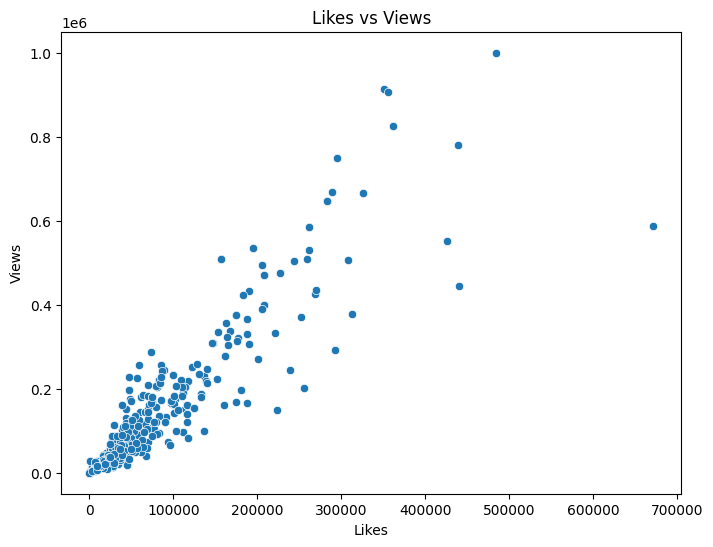

In [122]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x="Likes", y="Views", data=youtube_video_info_df)
plt.title("Likes vs Views")
plt.xlabel("Likes")
plt.ylabel("Views")
plt.show()

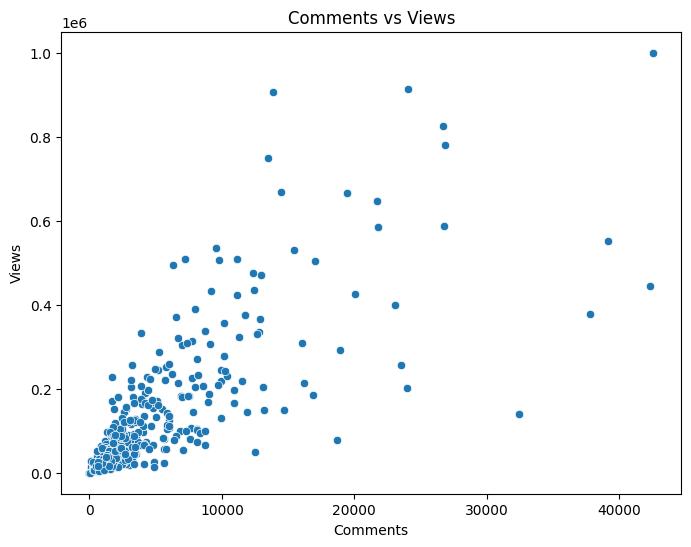

In [123]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x="Comments", y="Views", data=youtube_video_info_df)
plt.title("Comments vs Views")
plt.xlabel("Comments")
plt.ylabel("Views")
plt.show()




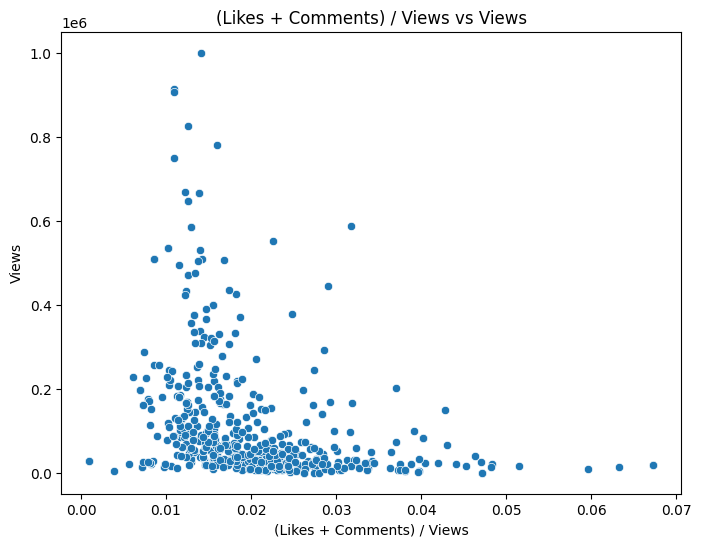

In [124]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x="(Likes + Comments) / Views", y="Views", data=youtube_video_info_df)
plt.title("(Likes + Comments) / Views vs Views")
plt.xlabel("(Likes + Comments) / Views")
plt.ylabel("Views")
plt.show()

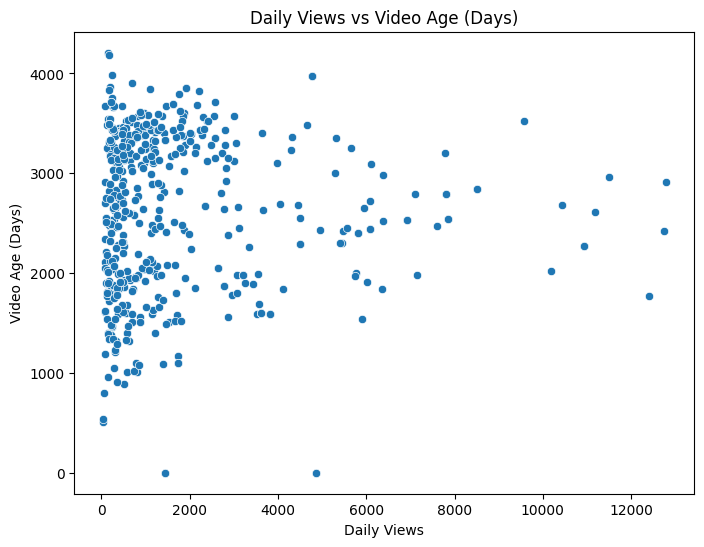

In [125]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x="Daily Views", y="Video Age (Days)", data=youtube_video_info_df)
plt.title("Daily Views vs Video Age (Days)")
plt.xlabel("Daily Views")
plt.ylabel("Video Age (Days)")
plt.show()

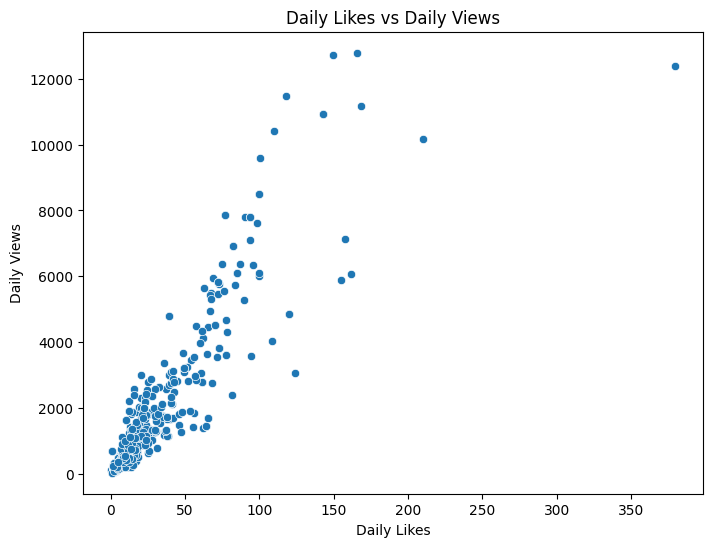

In [126]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x="Daily Likes", y="Daily Views", data=youtube_video_info_df)
plt.title("Daily Likes vs Daily Views")
plt.xlabel("Daily Likes")
plt.ylabel("Daily Views")
plt.show()

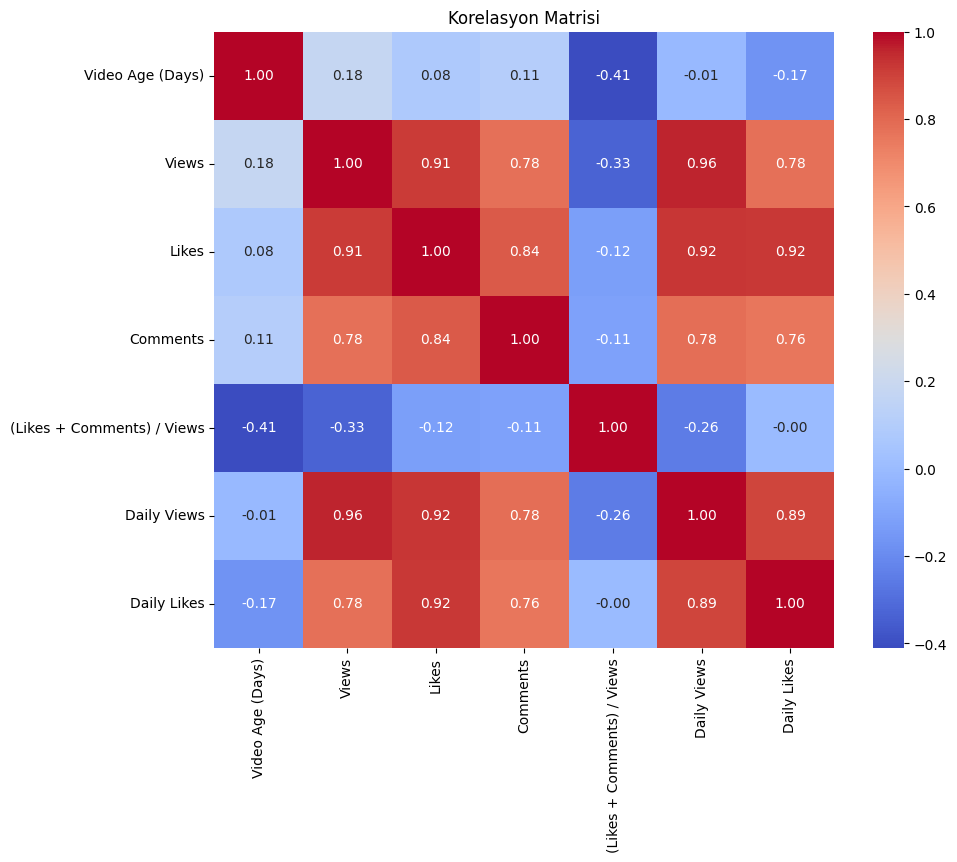

In [127]:
correlation_columns = [
    "Video Age (Days)", "Views", "Likes", "Comments",
    "(Likes + Comments) / Views", "Daily Views", "Daily Likes"
]

# Korelasyon matrisi
correlation_matrix = youtube_video_info_df[correlation_columns].corr()

# Korelasyon grafiği çizimi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korelasyon Matrisi")
plt.show()

In [128]:
from scipy.stats import f_oneway
import pandas as pd

# Sayısal sütunları seç
numeric_columns = ["Video Age (Days)","Likes", "Comments", "(Likes + Comments) / Views", "Daily Views", "Daily Likes"]

# ANOVA sonuçlarını tutmak için bir liste
anova_results = []

# Her bir sütun için ANOVA testi
for column in numeric_columns:
    f_statistic, p_value = f_oneway(youtube_video_info_df["Views"], youtube_video_info_df[column])
    anova_results.append({"Feature": column, "F-statistic": f_statistic, "P-value": p_value})

# Sonuçları DataFrame olarak göstermek
anova_df = pd.DataFrame(anova_results)

# Sonuçları yazdır
print("ANOVA Testi Sonuçları:")
print(anova_df)

# P-değerine göre değerlendirme
anova_df["Significant"] = anova_df["P-value"] < 0.05
print("\nÖnemli Farklar (P < 0.05):")
print(anova_df[anova_df["Significant"]])


ANOVA Testi Sonuçları:
                      Feature  F-statistic       P-value
0            Video Age (Days)   269.740929  6.634692e-54
1                       Likes    41.581357  1.749529e-10
2                    Comments   261.152882  2.014145e-52
3  (Likes + Comments) / Views   282.366350  4.581222e-56
4                 Daily Views   274.265378  1.109124e-54
5                 Daily Likes   282.235520  4.822394e-56

Önemli Farklar (P < 0.05):
                      Feature  F-statistic       P-value  Significant
0            Video Age (Days)   269.740929  6.634692e-54         True
1                       Likes    41.581357  1.749529e-10         True
2                    Comments   261.152882  2.014145e-52         True
3  (Likes + Comments) / Views   282.366350  4.581222e-56         True
4                 Daily Views   274.265378  1.109124e-54         True
5                 Daily Likes   282.235520  4.822394e-56         True


In [129]:
# P-değerine göre küçükten büyüğe sıralama
sorted_anova_df = anova_df.sort_values(by="P-value", ascending=True)

# Sıralı sonuçları yazdırma
print("ANOVA Testi Sonuçları (P-değerine göre küçükten büyüğe sıralı):")
print(sorted_anova_df)


ANOVA Testi Sonuçları (P-değerine göre küçükten büyüğe sıralı):
                      Feature  F-statistic       P-value  Significant
3  (Likes + Comments) / Views   282.366350  4.581222e-56         True
5                 Daily Likes   282.235520  4.822394e-56         True
4                 Daily Views   274.265378  1.109124e-54         True
0            Video Age (Days)   269.740929  6.634692e-54         True
2                    Comments   261.152882  2.014145e-52         True
1                       Likes    41.581357  1.749529e-10         True


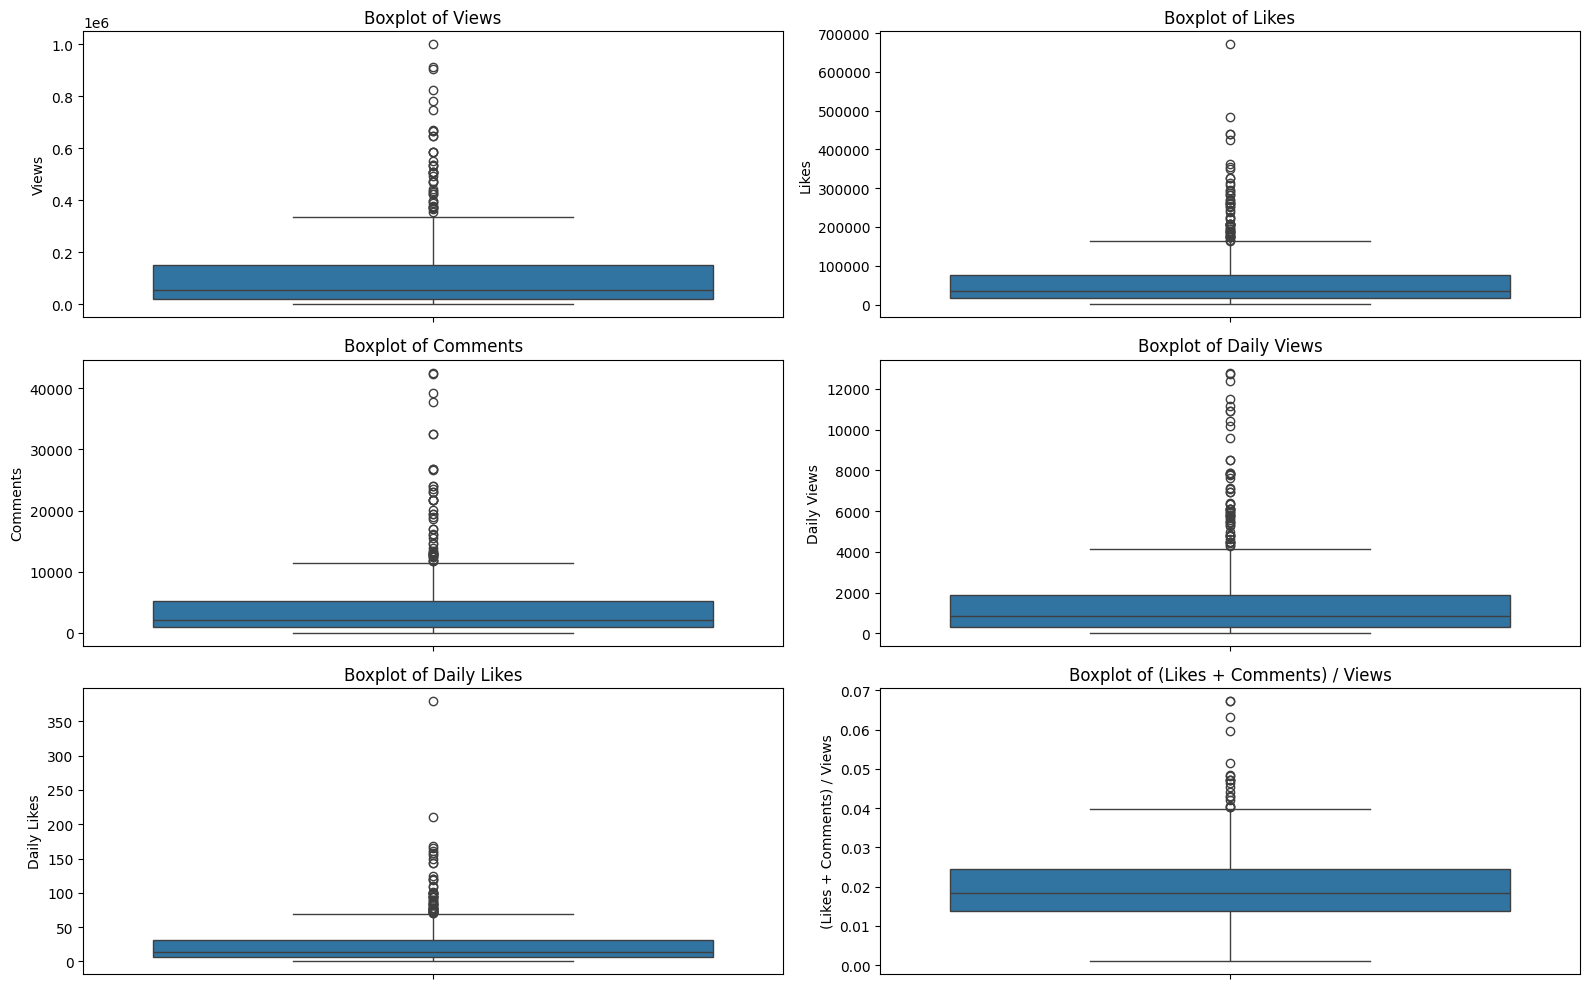

In [130]:


# Görselleştirilecek sütunlar
columns_to_visualize = ["Views", "Likes", "Comments", "Daily Views", "Daily Likes", "(Likes + Comments) / Views"]

# Boxplot çizimi
plt.figure(figsize=(16, 10))  # Görsel boyutu artırıldı
for i, column in enumerate(columns_to_visualize, 1):
    plt.subplot(3, 2, i)  # 3x2 grid içinde grafikleri yerleştir
    sns.boxplot(y=youtube_video_info_df[column])  # Doğru sütun aktarımı
    plt.title(f"Boxplot of {column}", fontsize=12)
    plt.ylabel(column, fontsize=10)

plt.tight_layout()
plt.show()


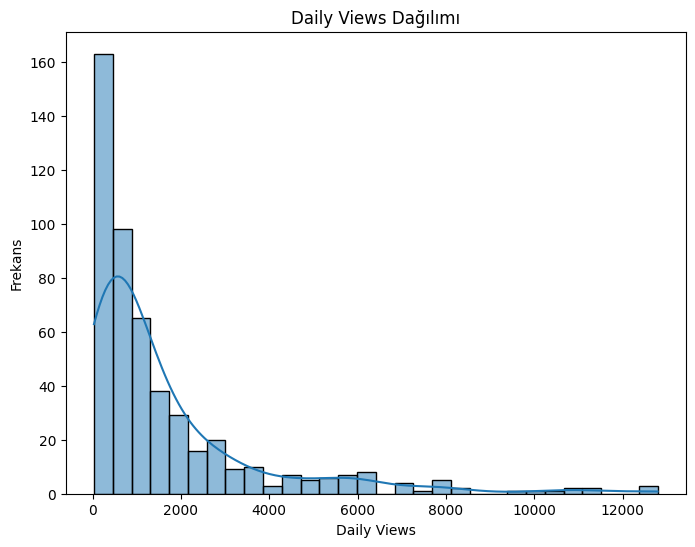

In [131]:
plt.figure(figsize=(8, 6))
sns.histplot(youtube_video_info_df["Daily Views"], bins=30, kde=True)
plt.title("Daily Views Dağılımı")
plt.xlabel("Daily Views")
plt.ylabel("Frekans")
plt.show()

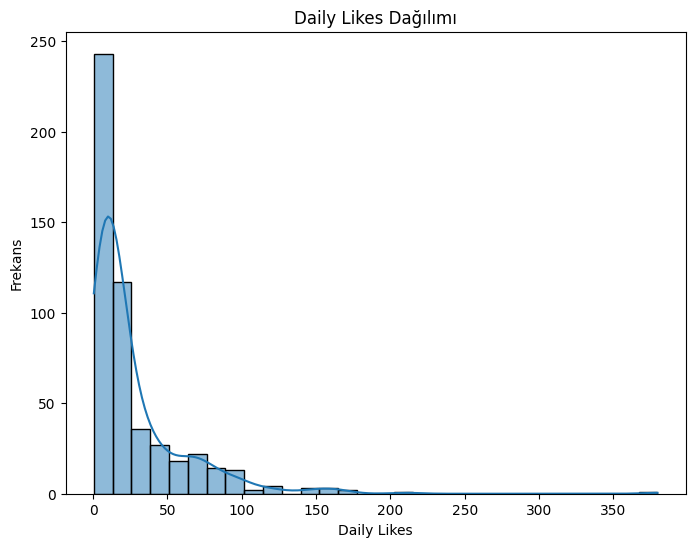

In [132]:
plt.figure(figsize=(8, 6))
sns.histplot(youtube_video_info_df["Daily Likes"], bins=30, kde=True)
plt.title("Daily Likes Dağılımı")
plt.xlabel("Daily Likes")
plt.ylabel("Frekans")
plt.show()

In [133]:
from scipy.stats import zscore

# Z-skoru hesaplama ve aykırı değerleri filtreleme
filtered_df = youtube_video_info_df[zscore(youtube_video_info_df["Views"]).abs() <= 3]




In [134]:
features = youtube_video_info_df[["Video Age (Days)","Likes", "Comments", "(Likes + Comments) / Views", "Daily Views", "Daily Likes"]]
target = youtube_video_info_df["Views"]

In [135]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [136]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [137]:
print("Linear Regression")
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)
linear_predictions = linear_model.predict(X_test_scaled)
linear_mse = mean_squared_error(y_test, linear_predictions)
linear_r2 = r2_score(y_test, linear_predictions)
print(f"MSE: {linear_mse}, R²: {linear_r2}\n")



Linear Regression
MSE: 394699220.6144826, R²: 0.9841494024477228



In [138]:
print("Random Forest Regressor")
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_scaled, y_train)
rf_predictions = rf_model.predict(X_test_scaled)
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)
print(f"MSE: {rf_mse}, R²: {rf_r2}\n")


Random Forest Regressor
MSE: 679877192.5873425, R²: 0.9726970330777526



In [139]:
print("K-Nearest Neighbors Regressor")
knn_model = KNeighborsRegressor()
knn_model.fit(X_train_scaled, y_train)
knn_predictions = knn_model.predict(X_test_scaled)
knn_mse = mean_squared_error(y_test, knn_predictions)
knn_r2 = r2_score(y_test, knn_predictions)
print(f"MSE: {knn_mse}, R²: {knn_r2}\n")

K-Nearest Neighbors Regressor
MSE: 2469955674.3376036, R²: 0.9008098538807899



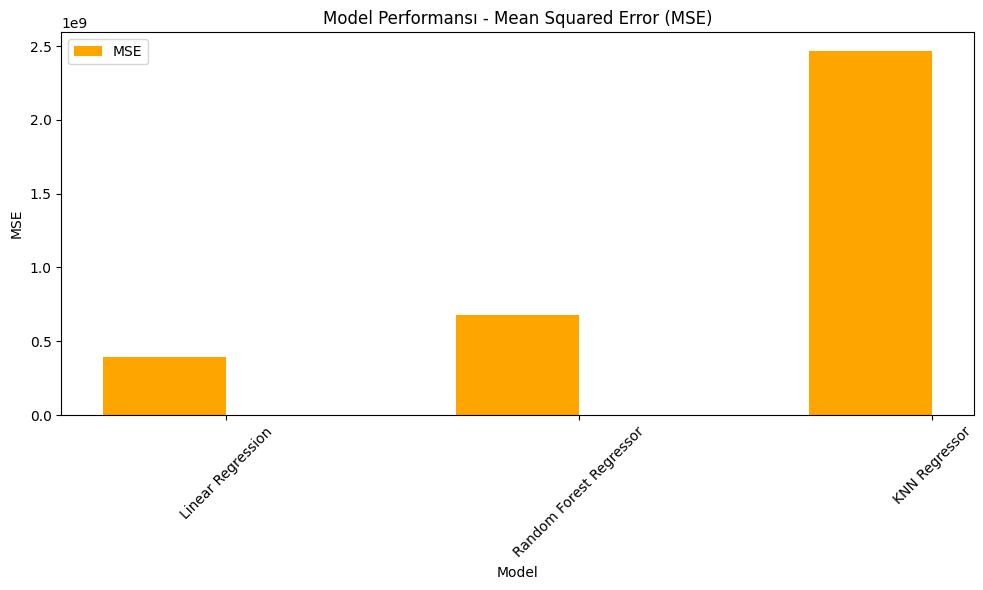

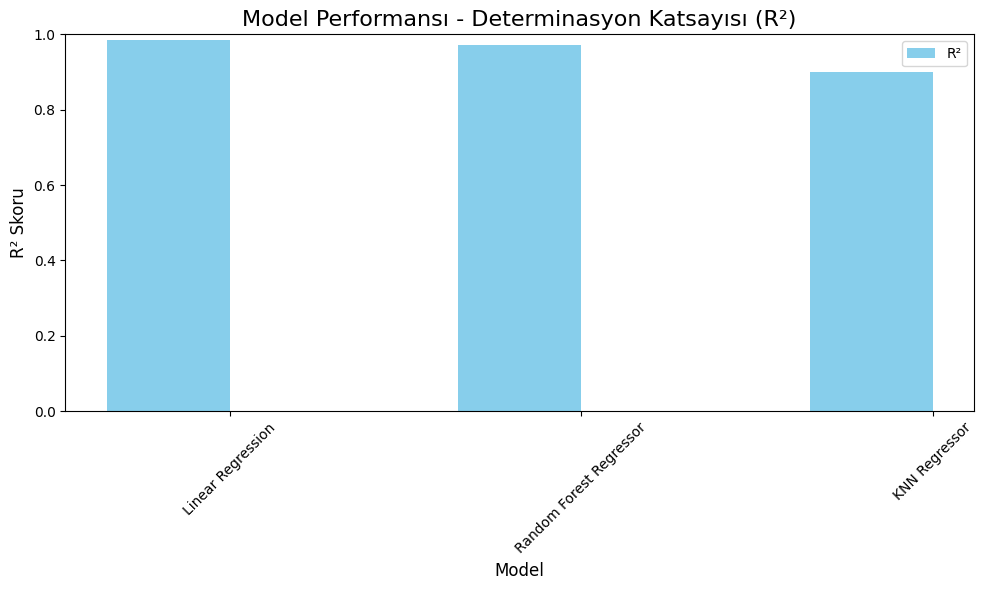

In [140]:
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest Regressor": RandomForestRegressor(random_state=42),
    "KNN Regressor": KNeighborsRegressor()
}

# Modelleri eğitme ve test etme
results = []

for name, model in models.items():
    # Modeli eğit
    model.fit(X_train_scaled, y_train)
    # Tahmin yap
    predictions = model.predict(X_test_scaled)
    # Performans metriklerini hesapla
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    results.append({"Model": name, "MSE": mse, "R²": r2})

# Sonuçları DataFrame'e dönüştürme
results_df = pd.DataFrame(results)

# Grafikleme
x = np.arange(len(results_df))
width = 0.35

# MSE Grafiği
plt.figure(figsize=(10, 6))
plt.bar(x - width/2, results_df["MSE"], width, label="MSE", color="orange")
plt.xticks(x, results_df["Model"], rotation=45)
plt.title("Model Performansı - Mean Squared Error (MSE)")
plt.ylabel("MSE")
plt.xlabel("Model")
plt.legend()
plt.tight_layout()
plt.show()
# R^2 Grafiği
x = np.arange(len(results_df))  # Model sayısı kadar indeks
width = 0.35  # Sütun genişliği

# R² Grafiği
plt.figure(figsize=(10, 6))
plt.bar(x - width/2, results_df["R²"], width, label="R²", color="skyblue")
plt.xticks(x, results_df["Model"], rotation=45)
plt.title("Model Performansı - Determinasyon Katsayısı (R²)", fontsize=16)
plt.ylabel("R² Skoru", fontsize=12)
plt.xlabel("Model", fontsize=12)
plt.ylim(0, 1)  # R² skorunun [0, 1] arasında olduğunu varsayıyoruz
plt.legend()
plt.tight_layout()
plt.show()

